In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
!pip install phik
from phik import phik_matrix
from sklearn.preprocessing import LabelEncoder
#Импорт библиотек

In [3]:
df = pd.read_csv('/Users/rslvtsv/Downloads/Pokemon!!!.csv')
#Ипорт файла 

In [4]:
df.info()
display(df.head())
#Знакомство с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Все типы данных соответствуют содержанию столбцов. Пропущенные значения присутствуют только в одном столбце - Type 2, около 50%. Возможно, потому что не все покемоны имеют второй тип. Заполнить можно либо -1, либо оставить как есть, выберем второй вариант и оставим как есть.

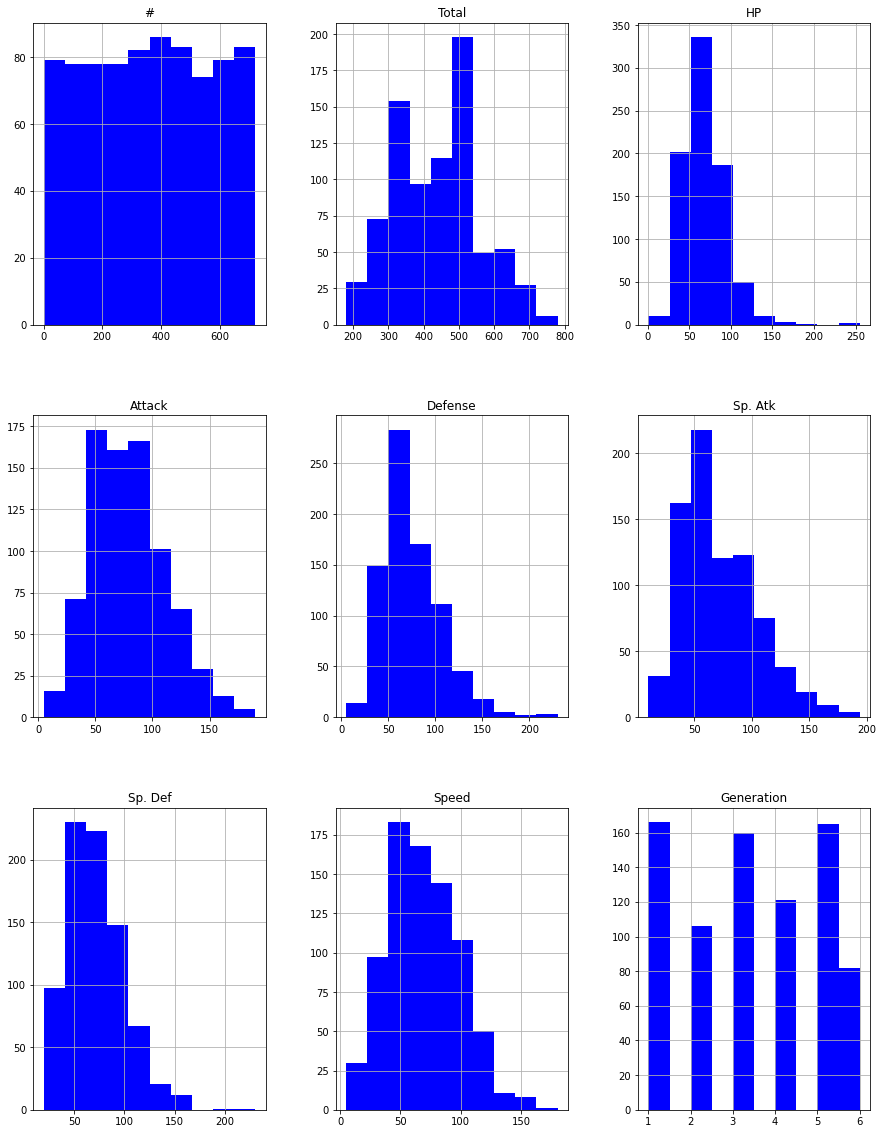

In [17]:
df.hist(figsize=(15, 20),
       color='blue'
       );

In [19]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Корреляционный анализ

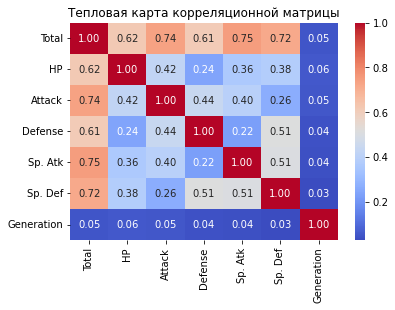

In [37]:
# Выбираем несколько столбцов из датафрейма
corr_columns = [
    'Total',
    'HP',
    'Attack',
    'Defense',
    'Sp. Atk',
    'Sp. Def',
    'Generation'
]

# Посчитаем матрицу корреляций
corr_matrix = df[corr_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

Рассмотрим отдельно корреляцию Attack с Total, Sp. Atk с Total и Sp. Def с Total

<AxesSubplot:xlabel='Attack', ylabel='Total'>

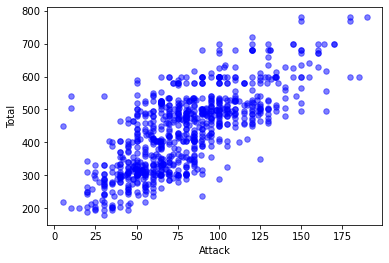

In [16]:
df.plot(
    kind='scatter',      # Определяет, что тип графика — scatterplot
    x='Attack',  # Данные по оси X
    y='Total',  # Данные по оси Y
    alpha=0.5,           # Прозрачность точек
    color='blue',
    s=30
) 

<AxesSubplot:xlabel='Sp. Atk', ylabel='Total'>

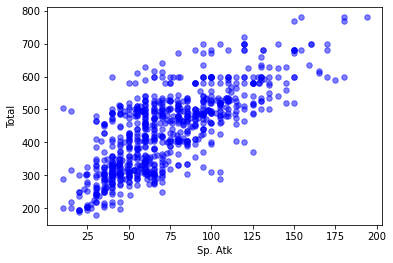

In [18]:
df.plot(
    kind='scatter',      # Определяет, что тип графика — scatterplot
    x='Sp. Atk',  # Данные по оси X
    y='Total',  # Данные по оси Y
    alpha=0.5,           # Прозрачность точек
    color='blue',
    s=30
) 

<AxesSubplot:xlabel='Sp. Def', ylabel='Total'>

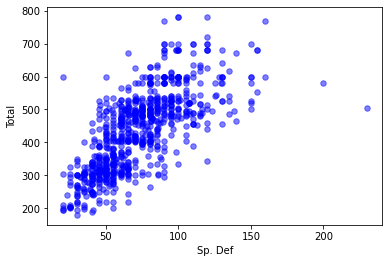

In [38]:
df.plot(
    kind='scatter',      # Определяет, что тип графика — scatterplot
    x='Sp. Def',  # Данные по оси X
    y='Total',  # Данные по оси Y
    alpha=0.5,           # Прозрачность точек
    color='blue',
    s=30
) 

## Кодирование категориальных признаков

In [20]:
cols = ['Type 1', 'Type 2', 'Legendary']

In [26]:
def unique_cols(df, columns):
  for column in columns:
    print(df[column].unique())

In [27]:
unique_cols(df, cols)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
[False  True]


In [33]:
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [34]:
df.describe()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,9.467500,13.235000,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,5.580356,5.595213,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,0.000000,0.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,5.000000,7.000000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,10.000000,16.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,14.000000,18.000000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,17.000000,18.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


## Обработка пропущенных значений

In [35]:
df['Type 2'] = df['Type 2'].fillna(-1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    int64 
 3   Type 2      800 non-null    int64 
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 81.4+ KB
